In [2]:
import imageio

In [3]:
woman = imageio.imread("woman.png")

In [5]:
woman.shape

(785, 732)

In [9]:
from skimage.filters import gaussian

# 1.

In [11]:
std2 = gaussian(woman, sigma=2)

In [12]:
std5 = gaussian(woman, sigma=5)

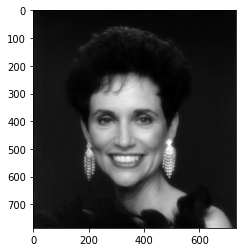

In [14]:
import matplotlib.pyplot as plt
plt.imshow(std2, cmap="gray")
plt.show()

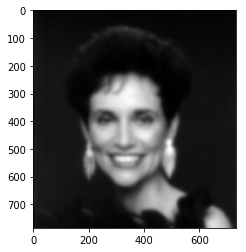

In [15]:
plt.imshow(std5, cmap="gray")
plt.show()

# 2. Box

In [19]:
import numpy as np

In [22]:
box = np.zeros((43, 43))

In [25]:
box[12:43-12, 12:43-12] = 1

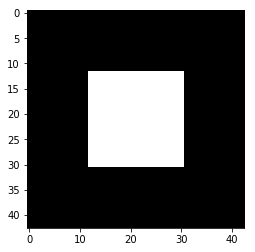

In [26]:
plt.imshow(box, cmap="gray")

# 3. DoB

In [28]:
from scipy.signal import convolve2d

In [29]:
dob = convolve2d(woman, box, mode="same")

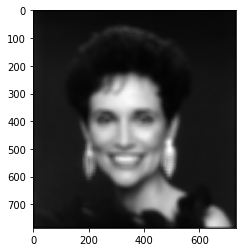

In [30]:
plt.imshow(dob, cmap="gray")

In [34]:
np.sign(woman)

Array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [48]:
curves = np.sign(std2 - std5) * np.sign(std2)

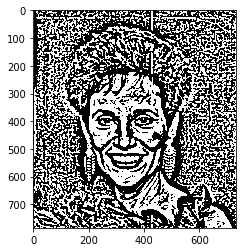

In [49]:
plt.imshow(curves, cmap="gray")

# Other:

# 1.

In [63]:
#c = a + b
C = np.array([[2, 2, 4, 4],
              [6, 8, 7, 8],
              [10,9, 11,7]])

In [ ]:
median(A+B) = [[0, 2, 2, 0],
               [2, 7, 7, 4],
               [0, 7, 7, 0]]

In [65]:
med_A = np.array([[0, 1, 1, 0],
                  [1, 2, 2, 1],
                  [0, 1, 1, 0]])

In [66]:
med_B = np.array([[0, 1, 0, 0],
                  [1, 5, 6, 1],
                  [0, 5, 6, 0]])

In [67]:
med_A + med_B

array([[0, 2, 1, 0],
       [2, 7, 8, 2],
       [0, 6, 7, 0]])

The results are different. Obviously, because median is not distributive.

# 2.

a) 
X is a gradient filter

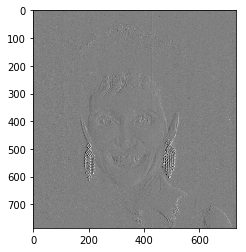

In [62]:
plt.imshow(convolve2d(woman, np.array([[-1, 0, 1]]), mode="same"), cmap="gray")

Y is a smoothing filter. it also accentuates edges

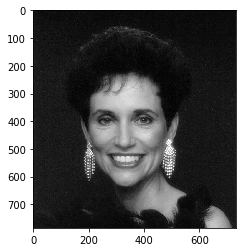

In [54]:
plt.imshow(woman, cmap="gray")

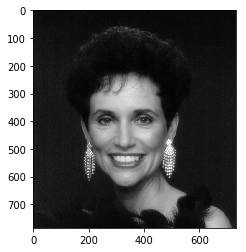

In [60]:
plt.imshow(convolve2d(woman, np.array([[1], [2], [1]]), mode="same"), cmap="gray")

b) conv2d(X,Y): [-1, 0, 1]
                [-2, 0, 2]
                [-1, 0, 1] => Vertical line detector
   X.T = [-1
           0
           1]
   y.T = [1, 2, 1]
   conv2d(X.T, Y.T) = [1, 2, 1]
                      [0, 0, 0]
                      [-1,-2,-1] => horizontal edge detection filter (Sobel)

In [84]:
XY = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

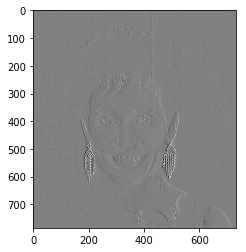

In [87]:
plt.imshow(convolve2d(woman, XY, mode="same"), cmap="gray")

# 3.

In [74]:
X = np.array([[1], [2], [1]])

In [75]:
 np.transpose(X)

array([[1, 2, 1]])

In [76]:
X

array([[1],
       [2],
       [1]])